# Bank Customer Churn: A Visual and Predictive Analysis (2022)

The aim of this project is to pinpoint the reasons behind customer churn in a multinational bank by analysing a dataset containing information about 10,021 customers, to support efforts to keep them from leaving. The data covers customers’ information such as their Credit Score, location, account balance and level of satisfaction. Important aspects involved

### Importation of Libaries 
Before conducting any meaningful analysis or modelling, it is essential to load the necessary Python libraries that enable data manipulation, visualisation, and machine learning tasks.

In [35]:
 #import librabries 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer



### Data Cleaning and Preparation 
The process in this stage was to clean and organize the data before beginning the main analysis. The key goals were to solve problems involving missing values, duplicates, inconsistent text and numbers and meaningless columns that may lead to in

#### Dataset importation 

In [2]:
# Imports dataset 
bank_data = pd.read_csv ('Customer Churn.csv')


##### Code Information: 
##### Install the proper Python libraries needed for data management, plotting and machine learning before doing major analysis or modelling. 


In [3]:
# Displays the first five rows 
bank_data.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### Data loading 

In [4]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


##### Code Information: The code is used to display the first five rows of the data set.

##### Code Output Analysis:The results provide a quick overview of the dataset structure and verify the column names.


#### Data information

In [5]:
# To get the information on the dataset 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10021 non-null  int64  
 1   CustomerId          10021 non-null  int64  
 2   Surname             10021 non-null  object 
 3   CreditScore         10021 non-null  int64  
 4   Geography           10021 non-null  object 
 5   Gender              10021 non-null  object 
 6   Age                 10009 non-null  float64
 7   Tenure              10021 non-null  int64  
 8   Balance             10021 non-null  float64
 9   NumOfProducts       10021 non-null  int64  
 10  HasCrCard           10021 non-null  int64  
 11  IsActiveMember      10021 non-null  int64  
 12  EstimatedSalary     10021 non-null  float64
 13  Exited              10021 non-null  int64  
 14  Complain            10021 non-null  int64  
 15  Satisfaction Score  10021 non-null  int64  
 16  Card

##### Code Information: The code retrieves information about the column, including the number of columns, non-null count, data type, and columns within the data set. 

##### Code Output Analysis:
##### This demonstrates that the dataset contains mixed data types, and the non-null values of the age column differ from those of the other columns, indicating that there are null values in that column.



#### Statistical Summary

In [6]:
# Shows the summaray statistics 
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10021.000000,1.002100e+04,10021.000000,10009.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000
mean,5010.996408,1.569086e+07,650.529388,38.925067,5.013172,76387.010380,1.530486,0.705518,0.515118,100078.131889,0.203972,0.204570,3.013671,606.321724
std,2892.951643,7.194713e+04,96.644991,10.486782,2.891799,62417.918229,0.581650,0.455832,0.499796,57510.288423,0.402968,0.403407,1.405263,225.897608
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2506.000000,1.562831e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51011.290000,0.000000,0.000000,2.000000,410.000000
50%,5011.000000,1.569070e+07,652.000000,37.000000,5.000000,97067.690000,1.000000,1.000000,1.000000,100236.020000,0.000000,0.000000,3.000000,604.000000
75%,7516.000000,1.575316e+07,718.000000,44.000000,8.000000,127631.620000,2.000000,1.000000,1.000000,149384.430000,0.000000,0.000000,4.000000,800.000000
max,10015.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


##### Code information: This is used to describe the statistical summary of the dataset 
##### Code Output Analysis:
##### The statistical summary highlights useful statistics for all the columns in the data. It shows that the typical client's age is about 38 years, with the youngest client being 18. The lowest credit score is 350, meaning some people are considered high-risk borrowers. The bank has a long-lasting client relationship, as its longest lender has stayed with the company for ten years.


#### Handling Null Value 

##### Overview of Missing Values

In [7]:
# Check null values 
bank_data.isnull().sum()


RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                   12
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Complain               0
Satisfaction Score     0
Card Type              0
Point Earned           0
dtype: int64

##### Code information: 
##### This code verifies the presence of null (missing) values within the dataset. The .isnull() function locates all missing entries in the DataFrame, while .sum() totals the number of null values found in each column. This fastens the process of discovering whether any data should be cleaned or replaced.

##### Code Output Analysis:Our analysis revealed that the age column had missing values, supporting our initial observation from the .info() function.




##### Null Value Removal

In [8]:
bank_data.dropna(inplace = True)
bank_data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

##### Code Information:
##### This code removes rows with null values from the bank_data DataFrame using .dropna(inplace=True), altering the original dataset. The next line, bank_data.isnull().sum(), checks for any remaining missing values, ensuring cleaner data for precise analysis.

##### Code Output Analysis: This indicates that null values have been eliminated from the dataset.



#### Handling duplicates 

In [9]:
# Check duplicated values 
dup_values = bank_data.duplicated().sum()
print('Duplicated value is: ', dup_values)

Duplicated value is:  0


##### Code Information: 
##### i.	dup_values = sum(bank_data.duplicated())
##### ii.	Brings out instances of data by using the .duplicated() function.
##### iii.	In essence, .sum() totals the True numbers which reflects the total number of duplicated elements.
##### iv.	The outcome is added to dup_values.
##### v.	.print('Duplicated value is: ', dup_values): Displays the total count of duplicate rows.





##### Code Output Analysis: This indicates that our dataset contains no duplicate values.

#### Removal of Non-Essential Columns 
RowNumber’, ‘CustomerId’ and ‘Surname’ were excluded from the dataset since they were not important for the analysis. By eliminating these unnecessary identifiers, we reduced redundancy and enhanced the dataset's efficiency for analysis.

In [10]:
# Drop irrelevant columns 

bank_data.drop(['RowNumber','CustomerId', 'Surname'], axis =1, inplace=True )

##### Code Information:
##### With the help of drop(), the code clears away unnecessary columns from the dataset. It specifically removes the 'RowNumber', 'CustomerId', and 'Surname' columns by setting axis=1 to indicate a column-wise operation and using inplace=True to apply the changes directly to bank_data.

#### Data Type Optimization for Key Columns

Correct analysis requires all data types to be properly handled. Matching types to each column will avoid mistakes and make the calculation process more effective.

##### Conversion of Age column

##### At first, the Age column had a float type, but because age is always an integer, it was then changed to an integer for consistency and better results.

In [11]:
# Convert age to int, age has to be an integer

bank_data['Age'] = bank_data['Age'].astype(int)


##### Code information:
##### The 'Age' column in bank_data was accessed, and the .astype(int) method was utilised to change its data type from float to integer.


##### Conversion of Categorical Features to Category Data Type.

##### Transforming these columns to categorical types reduces memory space and speeds up processing during analysis and model training, since these columns feature unique labels that are not numbers


In [12]:
# Convert categorical columns to appropriate types

bank_data['Gender'] = bank_data['Gender'].astype('category')
bank_data['Geography'] = bank_data['Geography'].astype('category')

##### Code information: 
##### This code converts the Gender and Geography columns of the dataset to the category data type. The .astype('category') method ensures that the data is correctly recognised as categorical.


In [13]:
# Shows first five rows of the cleaned dataset 

bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


##### Code Output Analysis:  Unnecessary data and data type errors have been dealt with by eliminating the relevant columns.  



### Data Analysis and Visualization

#####  Colour palette design

In [14]:
#Define colour pallete  for the notebook 

custom_palette = ['#1f77b4', '#aec7e8']

custom_blue_palette_6 = [
    "#0d3b66",  
    "#145DA0", 
    "#2E8BC0",  
    "#68A7D1",  
    "#A2D5F2",  
    "#E3F6FC"   
]



##### Code information:

##### Two styles of color palettes were established to maintain a professional appearance and make the design stand out more clearly. 
##### • Use two colours to visualise the outcomes of a binary classification (e.g., fraud or non-fraud).
##### • Using six colors for charts that include many categories. 



##### Churn Rate Analysis

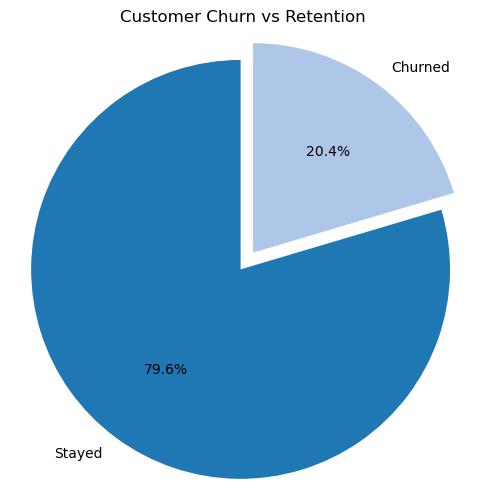

In [15]:

# Customer Churn rate vs Retention 

churn_counts = bank_data ['Exited'].value_counts()


labels = ['Stayed', 'Churned']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels,
        autopct='%1.1f%%', 
        startangle=90, 
        colors=custom_palette, 
        explode=[0, 0.1]
       )
plt.title('Customer Churn vs Retention')
plt.axis('equal')  
plt.show()



##### Code information:

##### The pie chart reflects how many customers stayed compared to how many churned based on the code. It counts the churned customers, labels the sections as "Stayed" and "Churned," and applies a personalised color palette. To draw attention to the churned segment, it is lightly weighted and the chart displays percentages for clear interpretation.


##### Insight

##### The pie chart shows that only 20.4% of customers have stopped using the app, while the rest, 79.6%, remain loyal. Even with a low churn rate, banking firms focus on retaining their customers for lasting earnings. On average, keeping customers is more affordable than attracting new ones and studies have demonstrated that a 25%-95% boost in profitability can be achieved through improved customer retention (Reichheld, 2003). 

##### Financial institutions make customers stick with them by providing custom services, loyalty programmes and better overall experiences because loyal customers are worth more in profit. For example, Chase and Bank of America introduce mobile services and develop custom solutions designed to keep customers and form lasting relationships (Lemon and Verhoef, 2016).

##### Churn Rate by Geography

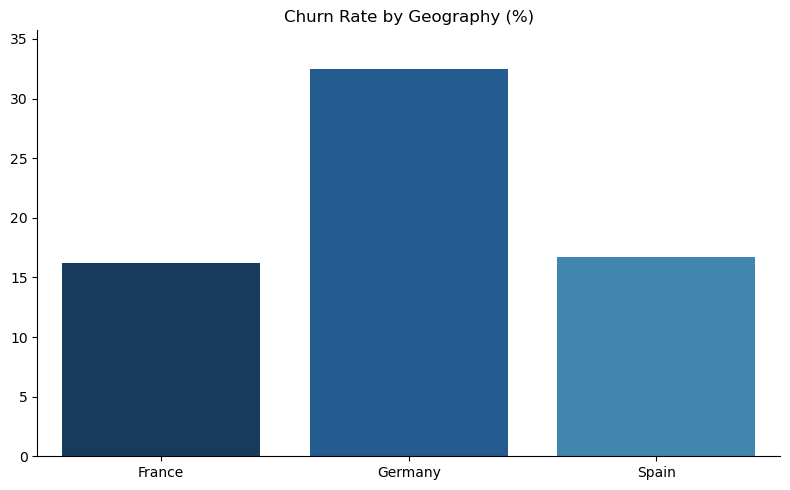

In [16]:
# Calculates churn rate by geography 
churn_by_geo = bank_data.groupby('Geography', observed=True)['Exited'].mean().reset_index()

# Converts churn rate to percentage
churn_by_geo['Exited'] = (churn_by_geo['Exited'] * 100).round(2)


plt.figure(figsize=(8, 5))
sns.barplot(x='Geography', 
            y='Exited', 
            data=churn_by_geo,
            hue='Geography', 
            palette= custom_blue_palette_6[:3],
            legend=False
           )
plt.title('Churn Rate by Geography (%)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, churn_by_geo['Exited'].max() * 1.1)
plt.xticks(rotation=0)
sns.despine()
plt.tight_layout()
plt.show()




##### Code Information: 
##### 1. Arrange data by location and calculate the typical churn rate (Exited column). 
##### 2. Take the churn rate and change it into a percentage, then round it to two decimal places. 
##### 3. Use a bar chart with a custom colours to show churn rates. 
##### 4. Remove the chart legend, set axis ranges and rotate the labels on the x-axis.


##### According to the bar chart, Germany tops the list in churn rate, surpassing France and Spain. This indicates that factors impacting customer satisfaction, rival companies and economic conditions help define churn at the regional level. Compared to other countries, increased competition in the German banking industry and rising online banking services cause a higher rate of customers switching banks (Koutsou et al., 2019). The way people feel about their economy has an influence on their willingness to shop.  (Chien,et al.,2021).

##### The French banks have a low turnover, as personal services and a focus on long-term relationships characterise their approach (Lemon and Verhoef, 2016). In Spain, being trustful and preferring steadiness in banking relationships leads to lower customer expenses because of fewer changes (Rodríguez and Rivas, 2016). Recognising these regional differences can support strategies that better keep customers in each area.



##### Age Distribution and Churn

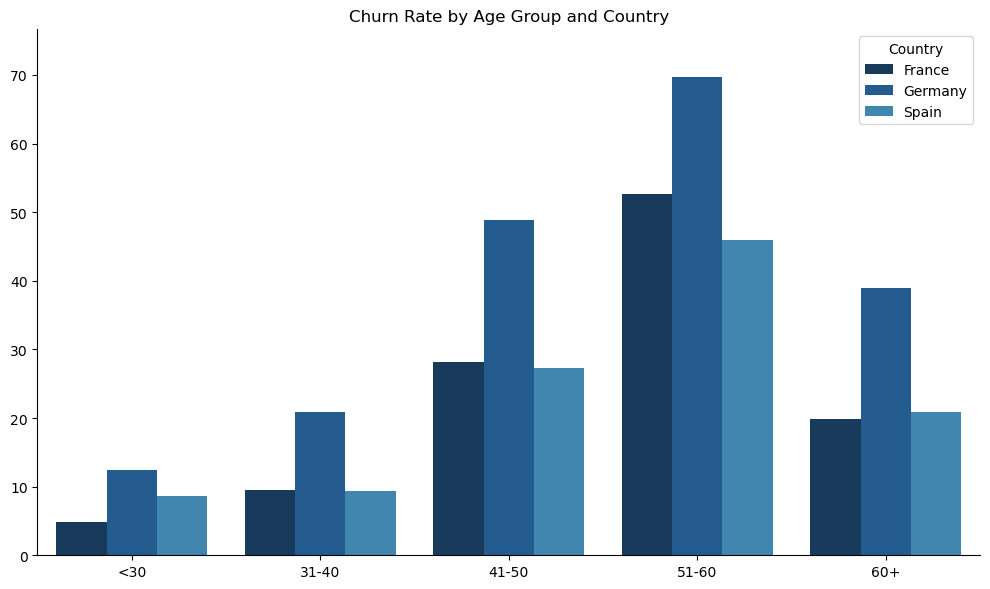

In [17]:
# Define bins and labels for age groups
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '31-40', '41-50', '51-60', '60+']
bank_data['AgeGroup'] = pd.cut(bank_data['Age'], bins=bins, labels=labels)

# Calculates churn rate by Age Group and Country
churn_by_agegroup_country = bank_data.groupby(['Geography', 'AgeGroup'], observed=False)['Exited'].mean().reset_index()
churn_by_agegroup_country['Exited'] = (churn_by_agegroup_country['Exited'] * 100).round(2)

# Plot churn rate by Age Group and Country
plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', 
            y='Exited', 
            hue='Geography', 
            data=churn_by_agegroup_country, 
            palette=custom_blue_palette_6[:3]
           )
plt.title('Churn Rate by Age Group and Country')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, churn_by_agegroup_country['Exited'].max() * 1.1)
plt.legend(title='Country')
sns.despine()
plt.tight_layout()
plt.show()


##### Code information:

#####  • Estimates customer churn according to their age and location. 
##### •	Organises ages into various age ranges (for instance, they may use <30, 31–40).
##### •	Analyses information from different locations and age groups to see the typical churn rate.
##### •	Calculates churn rates as a percentage out of the total number.
##### •	Plots a bar chart using a unique colour scheme to display the percentage of churn for each age group and country.
##### •	Improves the appearance of the chart to make it clear and easy to read (through the legend, limits on axis values and adjusting the layout).




##### Insight:  

##### Examining churn rates by age group proves that there is an important association between customer lifecycle stages and leaving the bank in retail banking. Germany shows that customers in the age brackets of 41–50 and 51–60 tend to churn more often, meaning financial planning for retirement is an important factor in their reasons to switch providers. Many of these people are interested in custom financial plans, including retirement benefits and attractive investment options (Arnett, 2021). Moreover, when there is significant competition for this group, people are more likely to switch banks (Zhao et al., 2020).  

##### Like in Germany, France sees higher churn among customers in the 41–50 age group, although it is somewhat less compared to Germany which could be because France values relationship banking and long-term customer ties (Lymperopoulos et al., 2007). 

##### Spain, however, shows a wider distribution of turnover, as people in the age groups 51–60 and those over 60 tend to change jobs more often. It suggests that the loss of older customers is more frequent, so banks should focus on helping senior clients with financial planning, not only those in the middle group. 


##### Recommendation

##### These insights are consistent with prior literature (Coșer et al., 2020; Mittal and Lassar, 2011), which confirms that age is a key factor influencing customer retention. The findings suggest that the bank  can effectively reduce churn by implementing customised, age-specific strategies, especially those focusing on retirement planning and long-term financial security.

#### Churn Rate Analysis by Account Balance
After exploring the connection between age and churn, we focused on determining how account balances influence churn in various countries.

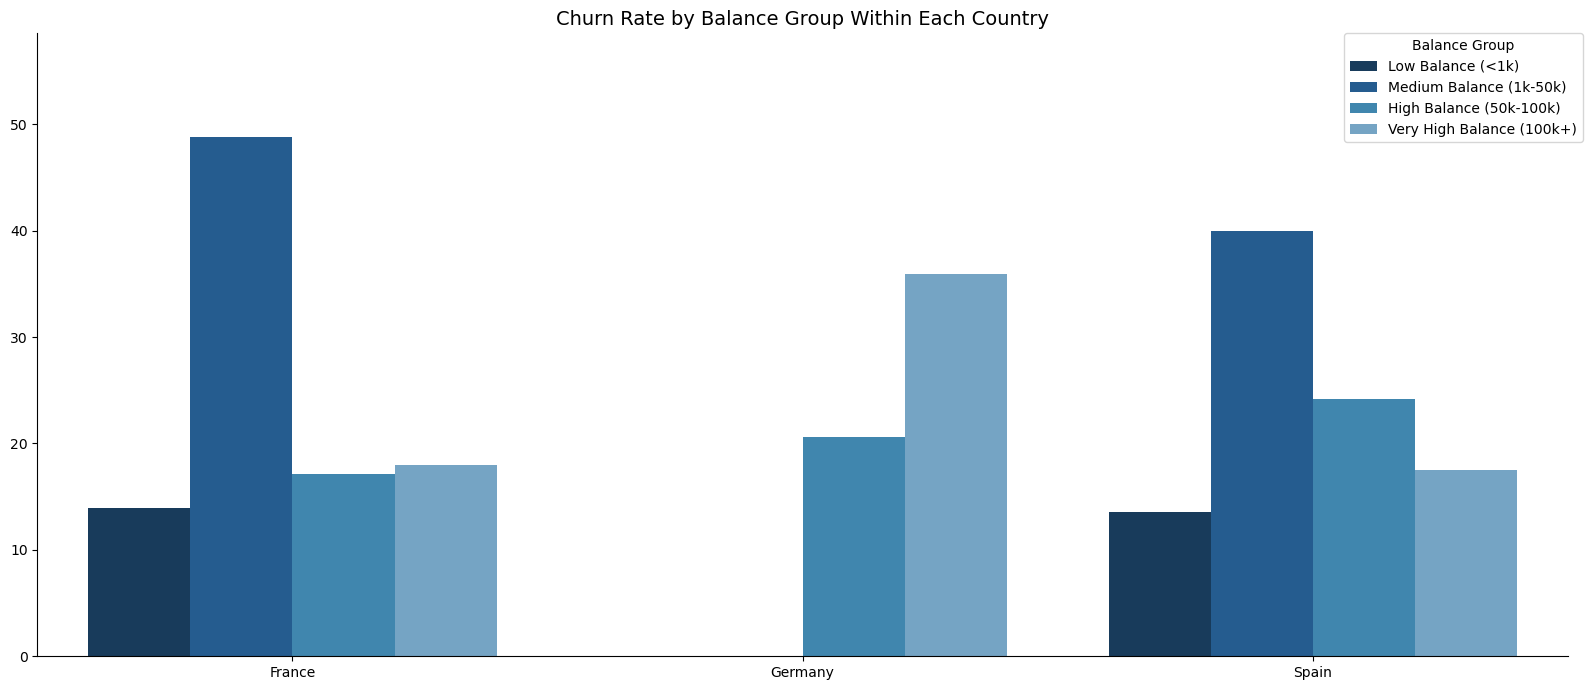

In [18]:
#  Create BalanceGroup 
bank_data['BalanceGroup'] = pd.cut(
    bank_data['Balance'],
    bins=[-1, 1000, 50000, 100000, 250000],
    labels=['Low Balance (<1k)', 'Medium Balance (1k-50k)', 'High Balance (50k-100k)', 'Very High Balance (100k+)']
)

#  Group by Geography and BalanceGroup to calculate churn rate
churn_geo_balance = bank_data.groupby(['Geography', 'BalanceGroup'], observed=True)['Exited'].mean().reset_index()
churn_geo_balance['Exited'] = (churn_geo_balance['Exited'] * 100).round(2)  # convert to percentage


balance_order = ['Low Balance (<1k)', 'Medium Balance (1k-50k)', 'High Balance (50k-100k)', 'Very High Balance (100k+)']
churn_geo_balance['BalanceGroup'] = pd.Categorical(churn_geo_balance['BalanceGroup'], categories=balance_order, ordered=True)

#  Sort for clean plotting
churn_geo_balance = churn_geo_balance.sort_values(by=['Geography', 'BalanceGroup'])


plt.figure(figsize=(16, 7))
sns.barplot(
    x='Geography',
    y='Exited',
    hue='BalanceGroup',
    data=churn_geo_balance,
    hue_order=balance_order,
    palette=custom_blue_palette_6[:4],
    dodge=True
)

plt.title('Churn Rate by Balance Group Within Each Country', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, churn_geo_balance['Exited'].max() * 1.2)
plt.xticks(rotation=0)
plt.legend(title='Balance Group', bbox_to_anchor=(1.01, 1), borderaxespad=0)
sns.despine()
plt.tight_layout()
plt.show()

##### Code Information: 
#####  1.	Creates a graph for each country, showing the churn for different balance groups. 
#####  2.	Debt is divided into four categories based on its severity: Low, Medium, High and Very High. 
#####  3.	Gathers information from all the regions and cheques the customer groups to compute the mean churn rate. 
#####  4.	Represents churn rates as percentages. 
#####  5.	Arranges structured data for use in making charts and graphs. 
#####  6.	Generates a bar chart showing churn by balance group for each country, applying a custom colour scheme and a clean design.


#####  Insight:
##### Having an accurate account balance is needed for determining customer value and handling portfolios. The study highlights different patterns in customer churn depending on the balance held by each country:

##### Among people with medium-sized accounts (1k–50k), France leads in how often customers switch to another provider. This indicates that medium-wealth customers, who seek higher service quality and personalised banking, are more likely to churn if their expectations aren't met (lemon and Verhoef, 2016). Should such customers be lost, it can harm the bank’s reputation and steady earnings. 

##### Spain has a similar pattern, as the medium-balance segment experiences more churn than the high-balance group. This means that Spanish banks struggle to hold onto important clients because the industry is so competitive.

#####  Distribution of account changes evenly in Germany, except for those with balances between 50k and 100k, who make up most of the balance group. This could mean that a lot of high-valued customers may be leaving, influencing the company’s financial stability. High net worth individuals regularly expect to find better deals from competitors (Zhao et al., 2020) which prompts banks to offer more personalised and exclusive products.



##### Recommendation:

##### Banks are encouraged to focus on certain customer retention techniques based on accounts and customer locations. Customers with a medium amount of usage are prone to drop out and require better attention and involvement from the company. Strategies for important clients in Germany, for example, involve managing their money and delivering first-class service.

##### Heatmap of Churn Rate by Geography and Balance Group

Following this, we create a heatmap that includes information on both geography and balance groups, providing a clearer comparison between countries.

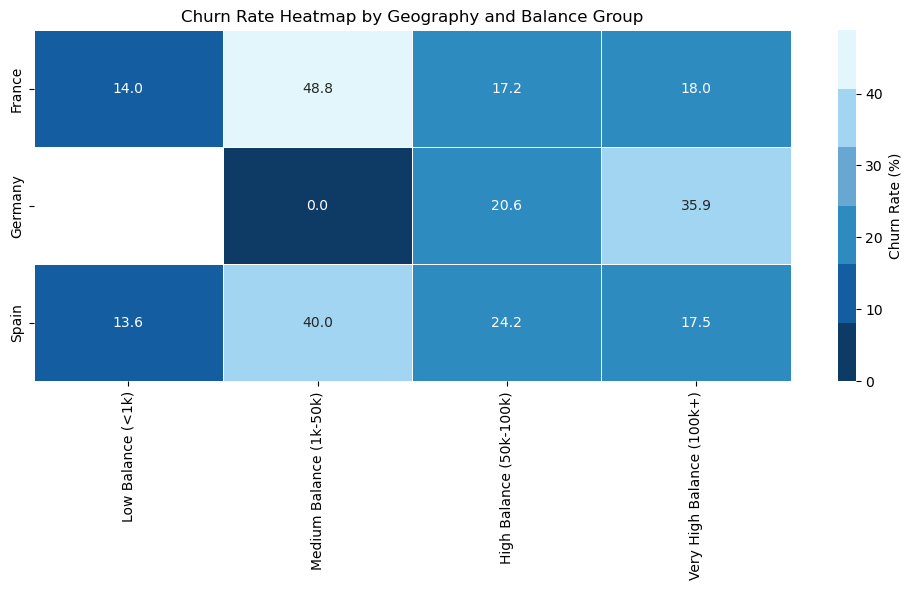

In [19]:

# Pivots the data into a matrix format
churn_pivot = churn_geo_balance.pivot(index='Geography', columns='BalanceGroup', values='Exited')



plt.figure(figsize=(10,6))
sns.heatmap(
    churn_pivot,
    annot=True,         
    fmt=".1f",         
    cmap=custom_blue_palette_6,      
    linewidths=0.5,    
    cbar_kws={'label': 'Churn Rate (%)'}
)

plt.title('Churn Rate Heatmap by Geography and Balance Group')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()


##### Code information: 
##### •	A heatmap grouping customers by their balances and the country they come from.
##### •	It organises the data with countries as rows and the types of balance as columns.
##### •	Queries churn rate for each matching country-balance group.
##### •	Generates a heatmap showing highlighted values for churn rates for all the cells.
##### •	Shade of blue signifies how strongly users are churning, from weak to intense.
##### •	Designed with grid lines and a colour bar marked with “Churn Rate (%)” for better understanding.
##### •	Selects a title and layout to guarantee that the chart is not cluttered.




##### Insights: 

##### The map highlights the ways people are changing their balances in different currencies and countries.

##### Among people with high savings (50k–100k), Germany records a churn rate of 35.9% which might lead to losing high-net-worth individuals (HNWIs). This group plays a crucial role in the bank's profitability and faces intense competition from competitors offering customised wealth services (Zhao et al., 2020; Gür Ali and Arıtürk, 2014).

##### For customers who have around 1,000 to 50,000 dollars in their accounts, the highest churn rates are seen in France (48.8%) and Spain (40.0%). They tend to have steady financial portfolios and pay attention to how good the service is and how much value they receive (Lemon and Verhoef, 2016). If people switch, it might suggest that their needs aren’t being met or that there aren’t enough personalised services.

##### There is a difference in churn rates depending on individuals’ financial position and where they live. This idea is highlighted in the dynamic churn framework proposed by Gür Ali and Arıtürk (2014).


##### Recommendation: 

##### High-balance German clients should be the main focus for retention, by providing them special investment offers and active contact from the bank. Improving the service at the mid-range bracket in France and Spain, by providing financial planning and incentives, might help reduce the churn rate. 

#### Activity Status and Churn in Germany
At this stage, we see if there is a relationship between customer activity and the rate of churn. 0 is assigned to cases where someone is not an active member and 1 is assigned to those who are active members.

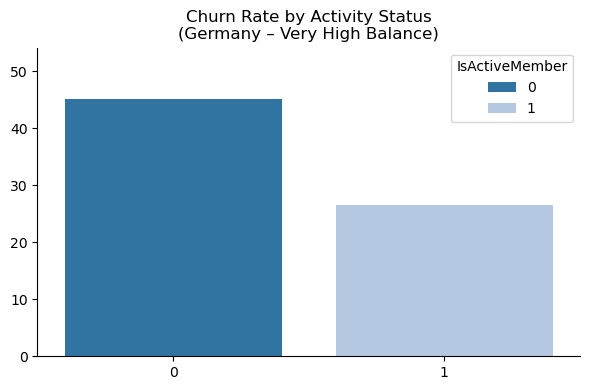

In [20]:
# Germany Very High Balance filter
germany_vhb = bank_data[
    (bank_data['Geography'] == 'Germany') &
    (bank_data['BalanceGroup'] == 'Very High Balance (100k+)')
]

# Churn rate among active vs inactive customers in Germany Very High Balance
churn_rate_by_activity = germany_vhb.groupby('IsActiveMember')['Exited'].mean().reset_index()
churn_rate_by_activity['Exited'] = (churn_rate_by_activity['Exited'] * 100).round(2)


plt.figure(figsize=(6,4))
sns.barplot(x='IsActiveMember',
            y='Exited', 
            data=churn_rate_by_activity, 
            hue='IsActiveMember',
            palette=custom_palette
           )
plt.title('Churn Rate by Activity Status\n(Germany – Very High Balance)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, churn_rate_by_activity['Exited'].max() * 1.2)
sns.despine()
plt.tight_layout()
plt.show()


##### Code Information: 
##### 1. Filters the data so that only German customers with over 100,000 euros in their accounts are included.
##### 2. Gathers the data by whether members are active or not and calculates the average churn rate for each type.
##### 3. Change churn rates to percentages, rounding them to two decimal spots.
##### 4. Creates a bar graph that shows how much members churn, comparing both active and inactive members within the chosen segment.
##### 5. Sharpen the plot by adding titles, organising axes and arranging the layout with colours that work well together.



##### Insight

##### The charts suggest that the inactive customers who have a lot of cash in their accounts are churning at a high rate. While accounts of all types experience churn, the highest churn rate in Germany occurs among inactive high-baling accounts. This demonstrates that it’s challenging to keep HNWIs interested in a business.


##### Recommendation: 

##### As a result, constantly focusing on wealthy customers is essential since they are more inclined to continue being loyal when they receive personalised financial help and special benefits (Morgan et al., 2020). The bank should pay great attention to personalised ways to interact, like tailored services, active management of relationships and loyalty programmes that have been proven to lower the number of clients leaving (Lemon and Verhoef, 2016).

#### Activity Status and Churn in France

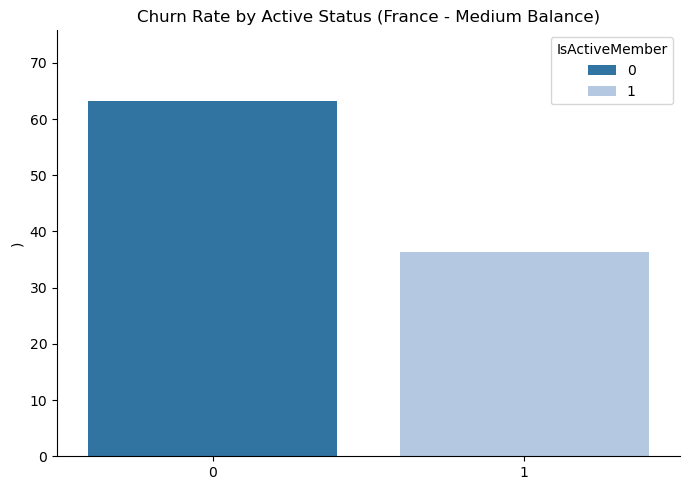

In [21]:
# Filter France + Medium Balance customers
france_data = bank_data[bank_data['Geography'] == 'France']
france_data.loc[:, 'BalanceGroup'] = pd.cut(
    france_data['Balance'],
    bins=[-1, 1000, 50000, 100000, 250000],
    labels=['Low Balance (<1k)', 'Medium Balance (1k-50k)', 'High Balance (50k-100k)', 'Very High Balance (100k+)']
)
medium_balance_france = france_data[france_data['BalanceGroup'] == 'Medium Balance (1k-50k)']

# Group by Active Status and calculate churn rate
churn_by_active = medium_balance_france.groupby('IsActiveMember', observed=True)['Exited'].mean().reset_index()
churn_by_active['Exited'] = (churn_by_active['Exited'] * 100).round(2)


plt.figure(figsize=(7,5))
sns.barplot(
    x='IsActiveMember', 
    y='Exited', 
    data=churn_by_active,
    hue = 'IsActiveMember',
    palette=custom_palette
)

plt.title('Churn Rate by Active Status (France - Medium Balance)')
plt.xlabel('')
plt.ylabel(')')
plt.ylim(0, churn_by_active['Exited'].max() * 1.2)
sns.despine()
plt.tight_layout()
plt.show()


##### Code Information: 
##### •		Uses filtering to choose data from customers located in France.
##### •	Bins the 'Balance' column into four categories: Low (<1k), Medium (1k–50k), High (50k–100k), and Very High (100k+).
##### •	Apply more filters that only leave Medium Balance (1k–50k) customers in France.
##### •	Sorts data based on activity status and then calculates the average rate of people leaving for every group.
##### •	Turns churn rates into proportions and round them to two decimals.
##### •	It produces a bar chart showing how many active members and inactive members churn in the Medium Balance group.
##### •	Enhances readability by adding titles, arranging content neatly and using a suitable set of colour options.


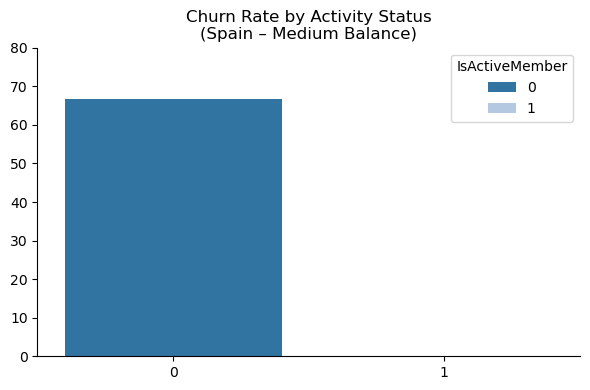

In [22]:
#Filter to Spain by Medium Balance Group
spain_mb = bank_data[
    (bank_data['Geography'] == 'Spain') & 
    (bank_data['BalanceGroup'] == 'Medium Balance (1k-50k)')
]

# Calculate churn rate by activity status
churn_rate_spain_mb = spain_mb.groupby('IsActiveMember')['Exited'].mean().reset_index()
churn_rate_spain_mb['Exited'] = (churn_rate_spain_mb['Exited'] * 100).round(2)



plt.figure(figsize=(6,4))
sns.barplot(x='IsActiveMember', y='Exited', data=churn_rate_spain_mb, hue = 'IsActiveMember', palette=custom_palette)
plt.title('Churn Rate by Activity Status\n(Spain – Medium Balance)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, churn_rate_spain_mb['Exited'].max() * 1.2)
sns.despine()
plt.tight_layout()
plt.show()

##### Code  Information: 
##### 1.	Selected only the Spanish customers who had medium balances.
##### 2.	Calculates the average rate at which people who are and are not active customers cancel their subscriptions.
##### 3.	Report churn as a percentage.
##### 4.	Represents the difference in churn by whether a customer is active or inactive.



##### Insight for France and Spain: 

##### Medium-balance customers who do not use their accounts regularly have higher chances of churning in both France and Spain compared to those who use their accounts often. This demonstrates that these customers are at a greater risk in both countries, mostly when they do not engage regularly with their banks. People who are not regularly active on the platform are more likely to quit if they do not receive personal attention (Lemon and Verhoef, 2016).  


##### Recommendation: 

##### This applies to medium balance customers the most, since they are more tempted by competitive deals and are more likely to switch providers. 


#### Satisfaction Score and Activity Status

##### We look at how customer satisfaction changes with activity and balance for those who have left in different countries. We want to understand if being satisfied with customer service impacts the chances of leaving the financial industry. As satisfaction is strongly tied to how long someone stays (Lemon and Verhoef, 2016), looking into these links could reveal that inactive churned customers are not very satisfied, most notably in the medium and high balance categories. By studying these insights, businesses can single out risky areas and plan better strategies to satisfy and retain their customers.

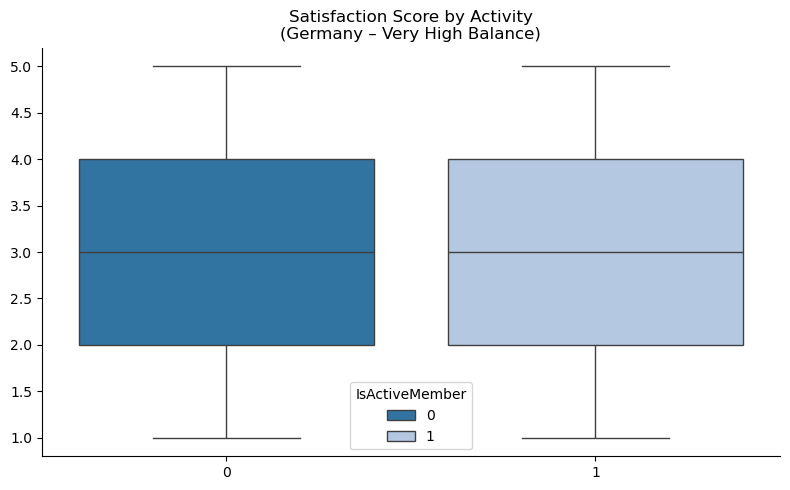

In [23]:
# Satisfaction Score by Active Status(Germany -Very high balance )

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='IsActiveMember', 
    y='Satisfaction Score', 
    data=germany_vhb, 
    hue = 'IsActiveMember',
    palette=custom_palette
)

plt.title('Satisfaction Score by Activity\n(Germany – Very High Balance)')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()


##### Code information: 
##### •	The filing uses the germany_vhb dataframe which only includes records for German clients with a balance exceeding 100k.
##### •	The y-axis represents how satisfied customers are and the x-axis distinguishes customers by their IsActiveMember status.
##### •	The use of a custom palette helps to highlight active members and inactive members differently.
##### •	The chart is named clearly, axis labels are removed and everything is arranged for easy reading.
y


##### Insight: 
##### The box plot shows that there is not a significant difference in how satisfied active and inactive clients are in Germany. This means that the happiness of HNWIs might not be influenced much by how much they take part. These clients usually achieve satisfaction by experiencing special services or unique deals, not by frequently using their bank (Gerrard and Cunningham, 2004). 

##### HNWIS give priority to expensive and high-class items which makes clients who rarely interact with a firm just as satisfied as those who are very engaged (Morgan and Hunt, 2020). For most customers, engagement matters a lot, but for wealthy customers, it plays only a small role in their satisfaction and retention. 

##### Still, competition with other banks and altered needs of HNWIs can result in some clients moving away, since they want more personalised financial guidance.  


##### Recommendation:
##### Even though satisfied inactive high-balance customers and active high-balance customers in Germany have the same satisfaction rates, it does not necessarily result in loyalty. Banks have to prioritise individual, luxury-oriented services for those with a high net worth. 

##### Make sure to give them special investment offers, distinct perks and their own team of wealth advisors. Besides, constantly observing what other providers have to offer matters a lot, as HNWIs might leave not because they are unhappy, but for better deals offered elsewhere. 

##### It is important to keep this segment by staying active with regular benchmarking and new ideas for extra premium features.


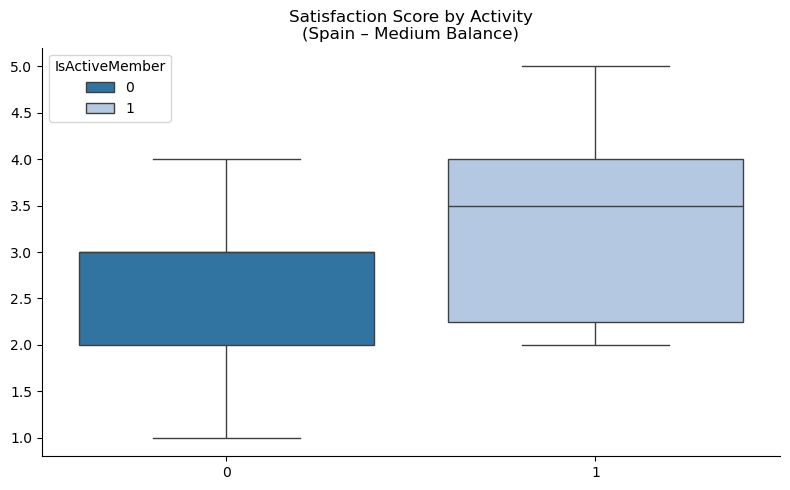

In [30]:
# Filter for Spain - Medium Balance customers
spain_mb = bank_data[
    (bank_data['Geography'] == 'Spain') &
    (bank_data['BalanceGroup'] == 'Medium Balance (1k-50k)')
]


plt.figure(figsize=(8,5))
sns.boxplot(
    x='IsActiveMember',
    y='Satisfaction Score',
    data=spain_mb,
    hue = 'IsActiveMember',
    palette=custom_palette
)
plt.title('Satisfaction Score by Activity\n(Spain – Medium Balance)')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()

##### Code Information: :
##### •	It selects rows where the country is Spain and the balance group is "Medium Balance (1k–50k)".
##### •	It makes use of Seaborn’s boxplot to observe if there are any differences in satisfaction scores between the active and inactive customers from this segment.
##### •	The process involves selecting the specific size, colouring and arrangement to ensure the plot looks good.



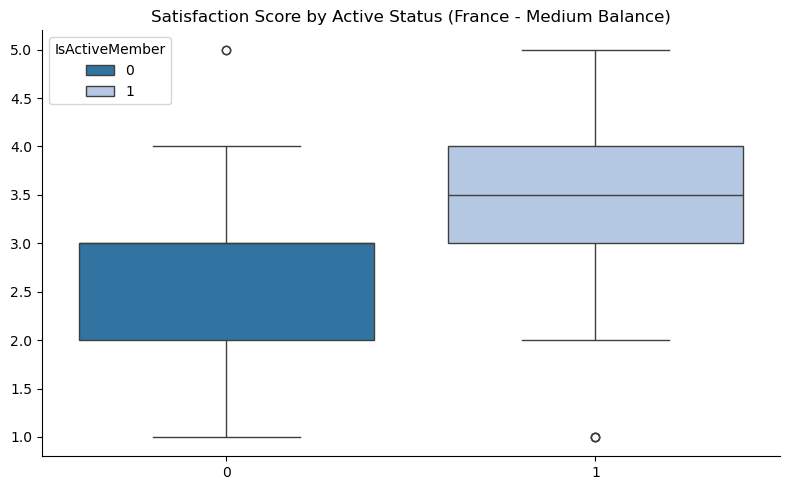

In [32]:
# Filter to France and Medium Balance Group
france_data = bank_data[bank_data['Geography'] == 'France']
france_data.loc[:, 'BalanceGroup'] = pd.cut(
    france_data['Balance'],
    bins=[-1, 1000, 50000, 100000, 250000],
    labels=['Low Balance (<1k)', 'Medium Balance (1k-50k)', 'High Balance (50k-100k)', 'Very High Balance (100k+)']
)
medium_balance_france = france_data[france_data['BalanceGroup'] == 'Medium Balance (1k-50k)']

plt.figure(figsize=(8,5))
sns.boxplot(
    x='IsActiveMember',
    y='Satisfaction Score',
    data=medium_balance_france,
    hue='IsActiveMember',
    palette=custom_palette
)

plt.title('Satisfaction Score by Active Status (France - Medium Balance)')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()


##### Code information: 
##### •	A way to filter customers residing in France.
##### •	Uses pd.cut to divide balances into four groups.
##### •	Selects only "Medium Balance (1k–50k)" customers.
##### •	Creates a boxplot that shows how satisfied people are by sorting activities by their activity status, measured on the x-axis and satisfaction scores, charted on the y-axis.
##### •	It allows you to set the figure size, use a custom color palette and design the page layout.


##### Insight for Spain and France

##### Active subscribers in France and Spain rate the experience highly, yet they still have a high rate of leaving the service. The main cause of this issue is banks competing with one another by giving out better deals or using strong marketing strategies like creating personalised financial services. 

#####  Satisfied customers also might consider changing banks because of these attractive benefits (Gerrard and Cunningham, 2004). Additionally, inactive customers are less involved which helps explain why they tend to churn more often (Lemon and Verhoef, 2016).

#### Product Engagement and Satisfaction

Besides checking how much money customers have in their accounts and their recent activity, how they engage with our products matters greatly when it comes to understanding churn and satisfaction. It is useful to monitor the number of products a customer has at the bank to see how involved they are. Those who purchase many products from a bank are more likely to keep close ties with the institution, possibly making them more likely to stay than to leave.

##### Churn Rate by Number of Products
To study how many products a customer buys and their likelihood of churning, we studied the statistics between churn and the amount of products purchased.

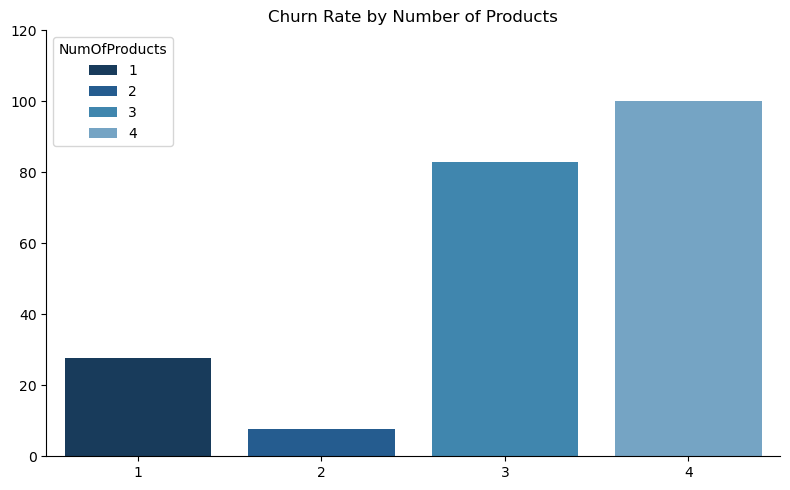

In [26]:


#Group by NumOfProducts and calculate churn rate
churn_by_products = bank_data.groupby('NumOfProducts', observed=True)['Exited'].mean().reset_index()
churn_by_products['Exited'] = (churn_by_products['Exited'] * 100).round(2)


plt.figure(figsize=(8,5))
sns.barplot(x='NumOfProducts', y='Exited', data=churn_by_products, palette=custom_blue_palette_6[:4],hue ='NumOfProducts')
plt.title('Churn Rate by Number of Products')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, churn_by_products['Exited'].max() * 1.2)
sns.despine()
plt.tight_layout()
plt.show()


##### The code calculates and visualizes the churn rate by the number of products a customer holds.
#####  •	The code helps to estimate and show the churn rate depending on the number of products purchased by a customer.
#####  •	It organizes the data by NumOfProducts and determines the mean Exited rate for each set.
#####  •	Next, the information is changed to a percentage and rounded to two decimal points.
##### •	To show the churn rate for each product line, a barplot is generated with a custom color theme of blue.
##### •	The chart includes a title, does not show axis labels, changes the y-axis limits for better visibility and has a simple arrangement.


##### Insight: 

##### A high number of churns from customers who use three or four products hints that their needs are not being addressed. The reason could be overzealous sales or bank staff pushing their clients, causing them to lacking fully understanding the benefits of these products. Furthermore, shoppers might feel unsatisfied because what they bought wasn’t up to what they expected. 


##### Recommendation: 
##### This underlines the importance of better personalised products and clear explanations about the benefits, helping customers receive added value instead of just more products (Koutsou et al., 2019; Lemon and Verhoef, 2016).


#### Satisfaction Score by Number of Products
We investigated the correlation between customer satisfaction and the number of items sold.


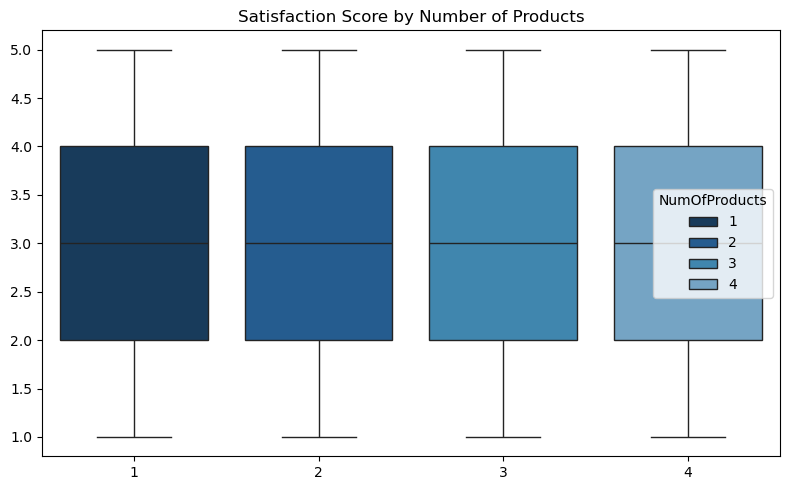

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='NumOfProducts', y='Satisfaction Score', data=bank_data, hue= 'NumOfProducts', palette=custom_blue_palette_6[:4])

plt.title('Satisfaction Score by Number of Products')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

##### Code Information: 
##### •	The code shows a chart showing how customer satisfaction changes with the quantity of items offered.
##### •	It produces a boxplot in which NumOfProducts is on the x-axis and Satisfaction Score is shown on the y-axis, with data from the bank_data DataFrame.
##### •	Colors used in the plot are appropriate, the chart is designed for a structured look and it helps explain changes in customers’ enjoyment of the product.


##### Insight: 

##### Data from the box plot suggests that customers with either 1 or 4 products are equally happy, showing that customer satisfaction is not influenced by product ownership. Such findings suggest that just adding more products does not ensure that users will be more content or remember the brand. 

##### Recommendation

#####  Improving products and enhancing how customers interact should be the goal, not just measuring satisfaction scores that depend on number of products.

##### 	Credit Score Analysis

##### Credit scores can have a major impact on whether a customer stays with a bank. Therefore, it is essential to determine if a customer's credit score in this dataset affects churn.


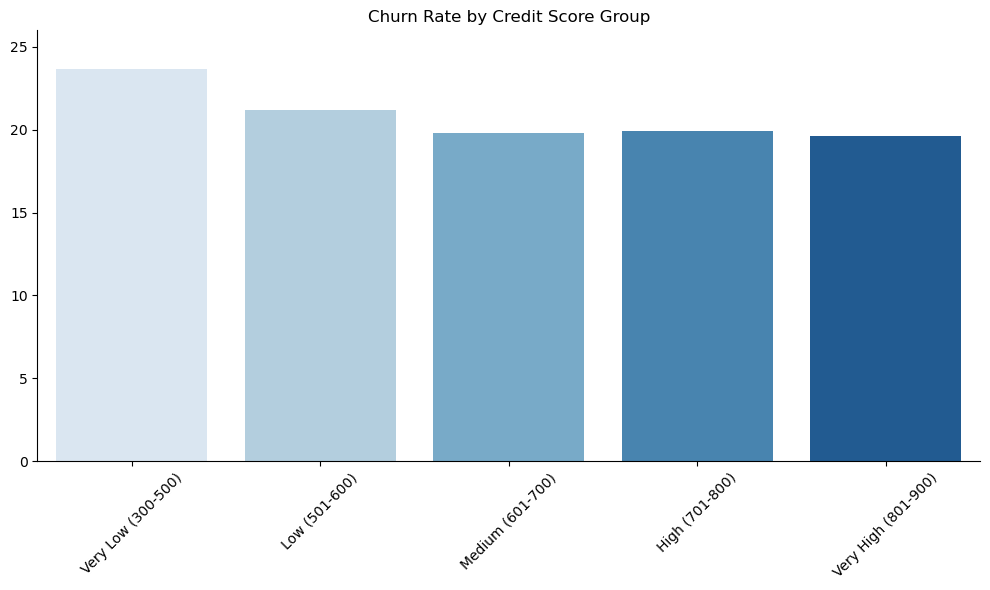

In [33]:
# Create Credit Score Groups
bins = [300, 500, 600, 700, 800, 900]
labels = ['Very Low (300-500)', 'Low (501-600)', 'Medium (601-700)', 'High (701-800)', 'Very High (801-900)']
bank_data['CreditScoreGroup'] = pd.cut(bank_data['CreditScore'], bins=bins, labels=labels)

# Calculate Churn Rate by Credit Score Group
churn_by_creditscore = bank_data.groupby('CreditScoreGroup', observed=True)['Exited'].mean().reset_index()
churn_by_creditscore['Exited'] = (churn_by_creditscore['Exited'] * 100).round(2)  # convert to %

# Sort by churn rate
churn_by_creditscore = churn_by_creditscore.sort_values('Exited', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='CreditScoreGroup',
            y='Exited',
            data=churn_by_creditscore,
            hue='CreditScoreGroup',
            palette='Blues',
            legend=False)

plt.title('Churn Rate by Credit Score Group')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, churn_by_creditscore['Exited'].max() * 1.1)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()


##### Code Details: 
##### •	It divides customers into five credit score levels from low to high by using pd.cut() and assigning them to groups named Very Low, Low, Medium, High and Very High.
##### •	Calculates Churn Rate: New groups based on CreditScoreGroup are created and the average number of exited customers (churn rate) is computed for each group which is shown as a percentage.
##### •	Ranked by Churn Rate: The list displays the categories that churn fastest first to highlight the most likely to churn.
##### •	A Seaborn bar chart is used to contrast the churn rates for credit scores in different ranges. The design uses variations of blue and the axes are accurately drawn for a neat presentation.


##### Insight: 

##### The expectation that more customers with weak financial histories will be lost to churn is related to their unstable finances. However, since churn is similar among people with all types of credit scores, it suggests credit scores and loan prospects do not greatly influence why customers leave. 



##### Recommendation:

##### The bank should focus on evaluating competitors' products, enhancing product differentiation, and fortifying strategies to retain customers.


#### Tenure, Credit Card, and Exited Analysis

##### Grasping the impact of having tenure and owning a credit card on customers leaving the bank matters a lot. Some argue that those with less banking history or without credit cards are more likely to move elsewhere. 


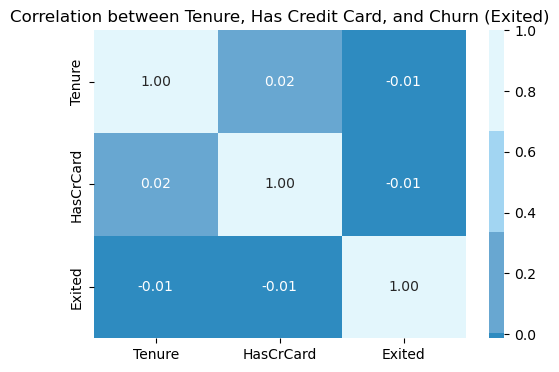

In [34]:
# Select only the relevant columns
selected_features = bank_data[['Tenure', 'HasCrCard', 'Exited']]

# Compute the correlation matrix
corr_selected = selected_features.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_selected, annot=True, fmt=".2f", cmap=custom_blue_palette_6, center=0)
plt.title('Correlation between Tenure, Has Credit Card, and Churn (Exited)')
plt.show()


##### Code Information: 

##### The code analyses the correlation between the variables Tenure, HasCrCard and Exited (churn) based on the data. The process involves pointing out these qualities, making a correlation matrix and outlining the findings in a heatmap in blue.                          


##### Insight
#####  The heatmap’s findings suggest that churn is not affected by tenure or credit card usage which goes against the opinion that extended tenure or owning a credit card improves loyalty to Tesla. As a result, the competition is seen as a main factor in causing customers to leave through stronger offers and strong advertising. The bank needs to understand what customers like, make products suitable for them and improve its marketing plans to better compete


In [28]:

X = bank_data.drop(columns=["Exited"])  
y = bank_data["Exited"] 

# Define categorical and numerical columns
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats), 
        ('cat', OneHotEncoder(drop='first'), cat_feats) 
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)


print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())



Before SMOTE: Exited
0    5577
1    1429
Name: count, dtype: int64
After SMOTE: Exited
1    5577
0    5577
Name: count, dtype: int64


##### Code information: 

##### The code develops, trains and tests a logistic regression model to predict who among the customers will churn. It follows a pipeline for developing the model, cheques it on resampled data and examines its performance using a classification report, confusion matrix and ROC curve. The ROC curve illustrates the model's effectiveness in differentiating between churned and retained customers.

##### Code Output Analysis:

##### It can be concluded from the results that SMOTE managed to achieve balance among all minority classes. In the beginning, there were 1,429 instances of customers who left, compared to 5,577 instances of those who remained. After using SMOTE, the number of instances in each class becomes equal, so the dataset is balanced and suitable for current training.

              precision    recall  f1-score   support

           0      0.908     0.719     0.802      2390
           1      0.395     0.715     0.508       613

    accuracy                          0.718      3003
   macro avg      0.651     0.717     0.655      3003
weighted avg      0.803     0.718     0.742      3003



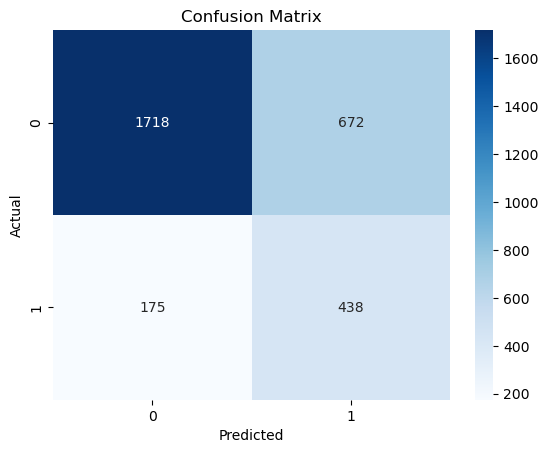

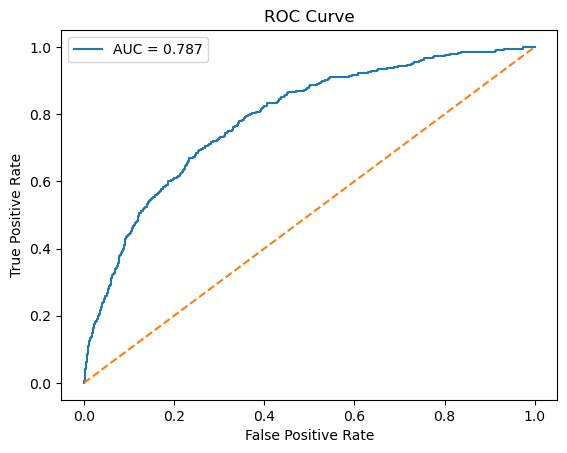

In [29]:
# Create the Logistic Regression model

clf = Pipeline([
    ('logreg', LogisticRegression(solver='liblinear', random_state=42)) 
])

# Fit the model to the resampled training data
clf.fit(X_train_resampled, y_train_resampled)


y_pred = clf.predict(X_test_preprocessed)


from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Classification Report
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_proba = clf.predict_proba(X_test_preprocessed)[:, 1]  # Probability estimates for the positive class (churned)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


##### Code information:

##### A resampled dataset is used by the code to build and assess a Logistic Regression model. The process starts by creating a pipeline that contains logistic regression and using it on the balanced data. Using the prepared test set, output predictions are produced and performance is evaluated using a classification report and a confusion matrix. Furthermore, the ROC curve is depicted to illustrate the model's effectiveness in differentiating between churned and retained customers, with the AUC (Area Under Curve) score presented as a performance metric.


##### Code Output Analysis: 

#####  The classification report illustrates the logistic regression model's performance, achieving an overall accuracy of 71.8%. For class 0, the model did very well, attaining a high precision of 0.908 and an F1-score of 0.802. In contrast, performance on class 1 (churned) is significantly lower, with a precision of just 0.395 and an F1-score of 0.508, showing the model's difficulty in accurately identifying churned customers. Both classes have similar recall ratings (~0.715), but the low precision for churn signifies many false positives. 

##### The confusion matrix helps understand how correctly logistic regression models predict whether a customer will leave. The system wrongly classified 1,718 actual non-churned customers (class 0) as churned, while it correctly guessed that 672 customers would stay on board. In the case of churned customers (class 1), the model identified 438 correctly but missed 175 (false negatives). Therefore, the model identifies non-churned customers reliably, but its ability to distinguish those who have churned is average. There's potential for improvement in minimising both false positives and false negatives

##### The ROC curve clearly shows that the logistic regression model is effective in telling apart customers who end up churning from those who stay, as it got an AUC of 0.787. It suggests that there is a 78.7% chance the model will pick a customer who will churn, unlike a customer who will not.
